In [1]:
from transformers import pipeline
import  argparse
import pandas as pd
import json
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ec6447a304e2f722d28a7e318118e243b0f07e82f5028d686f85ee874d903245
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [35]:
import wget
import os
filename = []
output_directory = "/content/drive/MyDrive"
urls = ['https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_bloomz.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_chatGPT.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_cohere.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_davinci.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_flant5.jsonl',
        'https://huggingface.co/datasets/NicolaiSivesind/ChatGPT-Research-Abstracts/raw/main/research_abstracts-final.csv']

for url in urls:
    output_filename = output_directory + '/' + os.path.basename(url) # get the full path of the file
    if os.path.exists(output_filename):
        os.remove(output_filename) # if exist, remove it directly
    filename.append(wget.download(url, out=output_filename))
print(filename)

['/content/drive/MyDrive/arxiv_bloomz.jsonl', '/content/drive/MyDrive/arxiv_chatGPT.jsonl', '/content/drive/MyDrive/arxiv_cohere.jsonl', '/content/drive/MyDrive/arxiv_davinci.jsonl', '/content/drive/MyDrive/arxiv_flant5.jsonl', '/content/drive/MyDrive/research_abstracts-final.csv']


# Test the human abstract and bloomz abstract using roberta-large-openai-detector

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", model="openai-community/roberta-large-openai-detector", device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/519 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at openai-community/roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_bloomz.jsonl', lines=True)

prediction_all = []
actual_all = ['machine' for _ in range(3000)]
actual_all.extend(['human' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 514
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)


1, 2, 3, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

['Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',

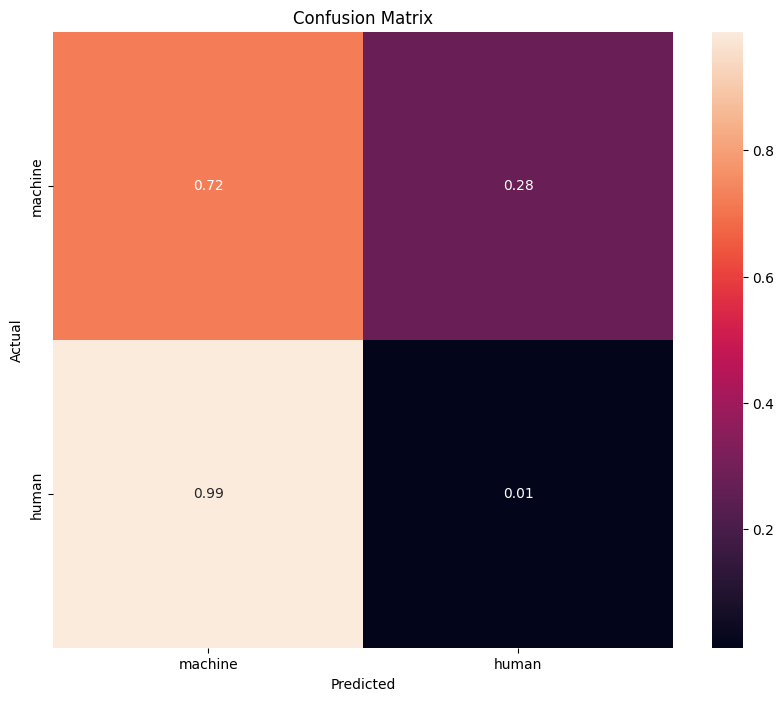

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['machine' if x == 'Label_0' else x for x in prediction_all]
prediction_all = ['human' if x == 'Label_1' else x for x in prediction_all]
print(prediction_all)
print(actual_all)
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["machine","human"], yticklabels=["machine","human"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and chatGPT abstract using roberta-large-openai-detector

In [18]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_chatGPT.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 514
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.human_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)


1, 2, 3, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

['Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',

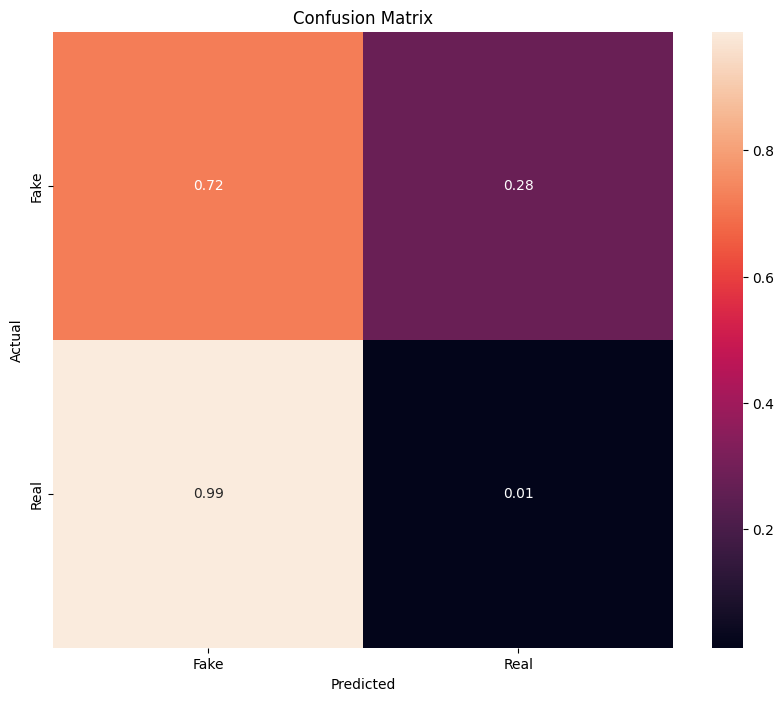

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Label_0' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Label_1' else x for x in prediction_all]
print(prediction_all)
print(actual_all)
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and bloomz abstract using roberta-academic-detector

In [24]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", model="andreas122001/roberta-academic-detector", device=device)

config.json:   0%|          | 0.00/885 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [25]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_bloomz.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)

1, 2, 3, 4, 5, 6, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 2

['Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 

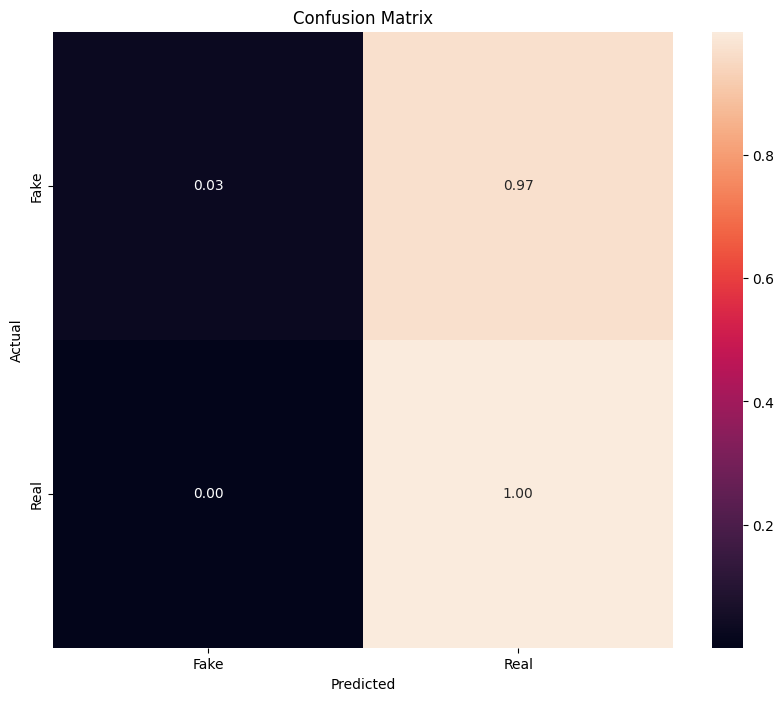

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Human-produced' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Machine-generated' else x for x in prediction_all]
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and chatgpt abstract using roberta-academic-detector

In [29]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_chatGPT.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 514
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.human_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)

1, 2, 3, 4, 5, 6, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 2

['Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Real',

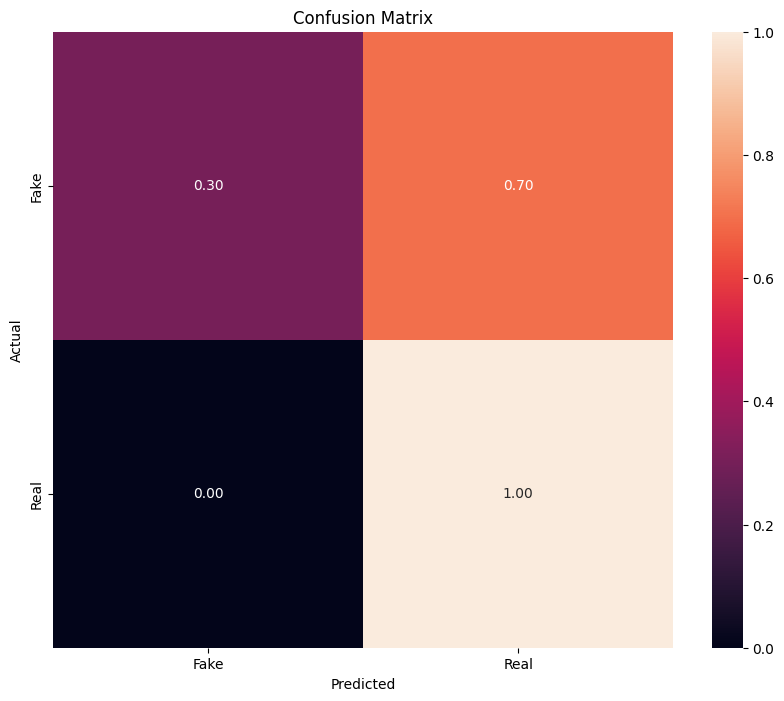

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and chatgpt-research-abstracts using roberta-academic-detector

In [37]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/research_abstracts-final.csv')

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 514
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.generated_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.real_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)

1, 2, 3, 4, 5, 6, 7, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

['Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real',

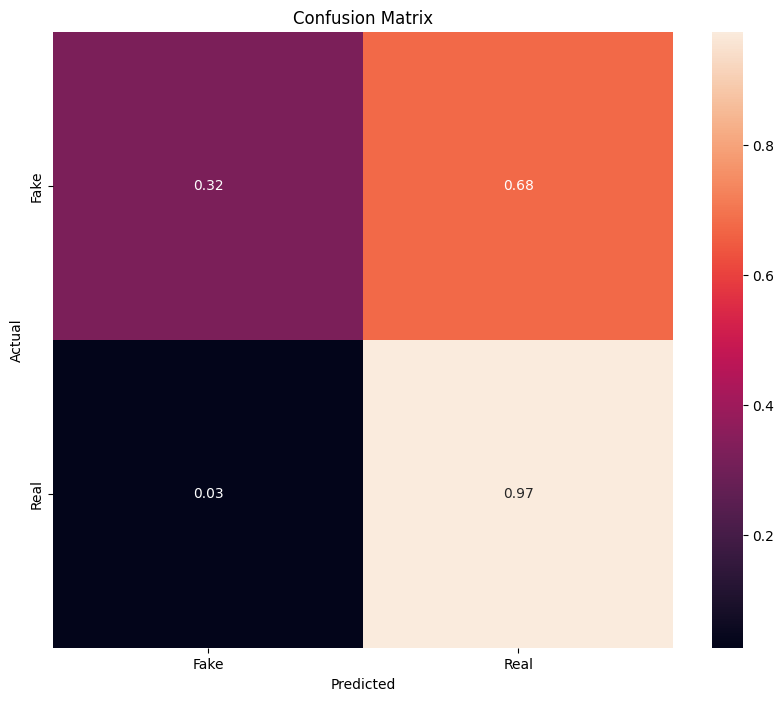

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
actual_all = ['Fake' for _ in range(10000)]
actual_all.extend(['Real' for _ in range(10000)])
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

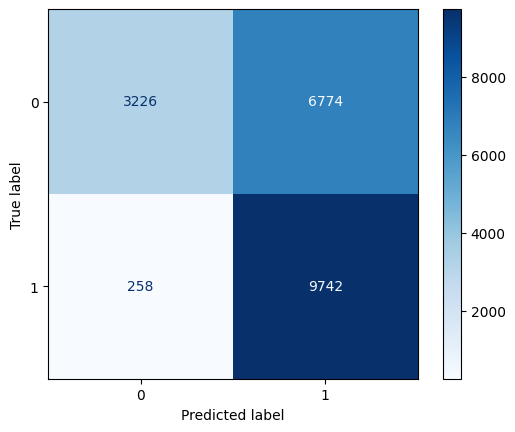

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(actual_all, prediction_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()